<a href="https://colab.research.google.com/github/umar052001/Deep-Learning-with-Tensorflow/blob/master/07_introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP fundamentals in Tensorflow

NLP has the goal of deriving information out of natural language (could be sequences text and speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq).

## Get helper functions

In [1]:
!wget https://raw.githubusercontent.com/umar052001/Deep-Learning-with-Tensorflow/master/helperFunctions.py

from helperFunctions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-09-15 22:22:42--  https://raw.githubusercontent.com/umar052001/Deep-Learning-with-Tensorflow/master/helperFunctions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10512 (10K) [text/plain]
Saving to: ‘helperFunctions.py’

helperFunctions.py  100%[===================>]  10.27K  --.-KB/s    in 0s      

2022-09-15 22:22:42 (81.3 MB/s) - ‘helperFunctions.py’ saved [10512/10512]



## Get a text dataset

The dataset we're going to use is Kaggle's introduction to NLP dataset (text samples of tweets labled as diaster or not diaster)

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2022-09-15 22:22:45--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.253.115.128, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-09-15 22:22:45 (158 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing text dataset

In [3]:
import pandas as pd
train_df =  pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Pretty balanced binary classification 

In [8]:
# How many samples?
len(train_df), len(test_df)

(7613, 3263)

In [9]:
# Let's visualize random samples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real diaster)" if target > 0 else "(not real diaster)")
  print(f"Text: \n{text}\n")
  print("---\n")

Target: 1 (real diaster)
Text: 
FedEx no longer will ship potential bioterror pathogens - FedEx Corp. (NYSE: FDX) will no longer deliver packages ... http://t.co/2kdq56xTWs

---

Target: 1 (real diaster)
Text: 
ÛÏRichmond Coaches were devastated to hear of the death of their second driver Mr Chance who was sittingÛ_: Jam... http://t.co/dIalTa6t69

---

Target: 1 (real diaster)
Text: 
600 passengers abandoned at LRT station during Tuesday's hailstorm http://t.co/vgF41IuPkn #yyc #yycstorm #abstorm

---

Target: 0 (not real diaster)
Text: 
#DU19 who gon get in this rap battle with me

---

Target: 0 (not real diaster)
Text: 
CAMILA'S DOING A FOLLOW SPREE TONIGHT IM SCREAMING OF HAPPINESS

---



### Split data into training and validation sets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_sentences, val_sentences,  train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                             train_df_shuffled["target"].to_numpy(),
                                                                             test_size=0.1,
                                                                             random_state=42)

In [12]:
len(train_sentences), len(val_sentences),  len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [13]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

There are few ways to do this, namely:
* Tokenization
*  Embedding

### Text vectorization(tokenization)

In [14]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizor = TextVectorization(max_tokens=None, # defines how many words in vocabulary (automatically adds <oov>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n words
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None, # how long do you want your sequence
                                    pad_to_max_tokens=False)

In [16]:
# Find the average number of tokens
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
max_vocab_length = 10000 # max number of words in our vocabulary
max_length = 15 # max length our vars will be
text_vectorizor = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [18]:
# fit text vectorizer to the training text
text_vectorizor.adapt(train_sentences)

In [19]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street"
text_vectorizor([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
# Choose random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text : \n{random_sentence}")
print(f"\n\nVectorized Version : {text_vectorizor([random_sentence])}")

Original text : 
Finnish Nuclear Plant to Move Ahead After Financing Secured-&gt; http://t.co/uHkXMXaB9l


Vectorized Version : [[2456  105 2800    5  769 1155   43 5641 8701    1    0    0    0    0
     0]]


In [21]:
# Get unique words in vocabulary
words_in_vocab = text_vectorizor.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words words: {top_5_words}")
print(f"5 least common words words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an embedding using Embedding Layer

Embedding is rich neumerical representation which can be learned during training.

Params we care more about are:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of our embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long.
* `input_length` = length of sequences being passed to the embedding layer

In [22]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, #set input shape
                             output_dim=128, # output shape
                             input_length=max_length)
embedding

In [23]:
random_sentence = random.choice(train_sentences)

print(f"Original text : \n{random_sentence}")
print(f"\n\nEmbededed Version : {text_vectorizor([random_sentence])}")

sample_embed = embedding(text_vectorizor([random_sentence]))
sample_embed

Original text : 
@King_Naruto_ As long as I see Madara bleeding I'm good ??


Embededed Version : [[  1  26 480  26   8  99   1 587  32 136   0   0   0   0   0]]


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04683903,  0.01486573, -0.02780171, ..., -0.0079063 ,
         -0.00039761,  0.01829282],
        [ 0.04488498, -0.02935326, -0.04652852, ...,  0.03380029,
         -0.04191084,  0.03300612],
        [-0.02270782, -0.02571425,  0.02391774, ..., -0.02828163,
          0.0467344 ,  0.03818215],
        ...,
        [ 0.02767852, -0.01007007,  0.03506594, ..., -0.02855086,
         -0.01879266,  0.03650614],
        [ 0.02767852, -0.01007007,  0.03506594, ..., -0.02855086,
         -0.01879266,  0.03650614],
        [ 0.02767852, -0.01007007,  0.03506594, ..., -0.02855086,
         -0.01879266,  0.03650614]]], dtype=float32)>

In [24]:
# Check out single token's embeding
sample_embed[0][0], sample_embed[0],[0], random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04683903,  0.01486573, -0.02780171, -0.04809263, -0.02039313,
         0.0146823 , -0.03714484, -0.02970212,  0.02704105, -0.02105966,
        -0.02007029,  0.03466674, -0.01439226,  0.00977935,  0.01270122,
         0.00495011, -0.02477835, -0.04981147, -0.01685236, -0.01151722,
        -0.00014649, -0.03305632, -0.01183579,  0.04062596,  0.03516364,
        -0.03775354,  0.00790917,  0.03267522,  0.0475976 ,  0.04066389,
         0.03434283, -0.02115428,  0.00119604, -0.00301099, -0.04582844,
         0.03415031, -0.03281531, -0.0435425 ,  0.03948966,  0.02683032,
        -0.01792346,  0.03272321, -0.03027393, -0.04318608, -0.02771096,
         0.03527823, -0.01396351, -0.01461094,  0.00439065,  0.03701483,
        -0.01840919,  0.04468466,  0.01678491,  0.03630351,  0.01724771,
        -0.0167951 , -0.00484623, -0.02024409, -0.0214394 ,  0.02833028,
        -0.01249665,  0.0161353 ,  0.0003186 ,  0.01682338,  0.04549502,
  

## Modeling a text dataset (running a series of experiments)

We'll start from baseline and move on from there:
* Model 0: Naive Bayes (baseline)
* Model 1: Feed-Forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D CNN
* Model 6: Tensorflow Hub pretrained feature extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

### Model 0 : Getting a baseline

We'll use Sklearn's multinomial Naive Bayes using TF-IDF formula to vonvert our words to numbers.
> Its common practice to use non-DL algorithms as a baseline because of there speed and later using DL to see if we can improve upon them.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # Model the text
])
# Fit the pipeline to training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline model achieves an accuracy of {baseline_score * 100:.2f}%")

Baseline model achieves an accuracy of 79.27%


In [27]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_preds):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model
  Args:
    y_true: Ground truth labels
    y_preds: Prediction labels
  Returns:
    A dictionary of accuracy score, precision recall and f1-score
  """
  # Calculate model accuracy 
  model_accuracy = accuracy_score(y_true, y_preds) * 100
  # Calculate model precision, recall and f1-score using "weigted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  # Result dictionary
  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [29]:
# Get baseline results
baseline_results = calculate_results(val_labels,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model

In [30]:
# Create a tensorboard callback (need to create a new one for each model)
from helperFunctions import create_tensorboard_callback

# Create a dir to save logs
SAVE_DIR = "model_logs"

In [31]:
# Build model with Functional Api
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizor(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x) # sigmoid for binary
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [32]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [33]:
model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [34]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220915-222250
Epoch 1/5
215/215 [==============================] - 8s 9ms/step - loss: 0.6104 - accuracy: 0.6859 - val_loss: 0.5340 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4403 - accuracy: 0.8189 - val_loss: 0.4678 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3460 - accuracy: 0.8615 - val_loss: 0.4599 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2844 - accuracy: 0.8904 - val_loss: 0.4636 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2367 - accuracy: 0.9101 - val_loss: 0.4825 - val_accuracy: 0.7848


In [35]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.7848


[0.4825327694416046, 0.7847769260406494]

In [36]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [37]:
model_1_pred_probs[0]

array([0.32648388], dtype=float32)

In [38]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [39]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 78.4776902887139,
 'precision': 0.789165199286798,
 'recall': 0.7847769028871391,
 'f1': 0.7818959205825942}

In [40]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

It looks like our basline model is outperforming our deep learning model

## Visualizing learned embeddings

In [41]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizor.get_vocabulary()
len(words_in_vocab)

10000

In [42]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [43]:
# Get the weight metrics of embedding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


Now we've got embedding matrix our model has learned to represent our tokens let's visualize it.

In [44]:
# Creating embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [45]:
# Download files from colab to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network

RNN's are used for sequence data.
The premise of RNN is to use the representation of a previous input to aid the representation of a later input.

### Model 2: LSTM

LSTM = one of the most popular LSTM cells

Our structure for RNN's typically looks like this:
```
Input (text) -> Tokenize -> Embedding -> Layers(RNN/dense) -> Output(label probability)
```

In [46]:
# Create LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizor(inputs)
x = embedding(x)
# x = layers.LSTM(units=64, return_sequences=True)
x = layers.LSTM(64)(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [47]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [48]:
# fit the model
history_model_2_LSTM = model_2.fit(train_sentences,
                                   train_labels,
                                   epochs=5,
                                   validation_data=(val_sentences, val_labels),
                                   callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                          "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220915-222313
Epoch 1/5
215/215 [==============================] - 6s 8ms/step - loss: 0.2243 - accuracy: 0.9222 - val_loss: 0.5774 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1578 - accuracy: 0.9416 - val_loss: 0.5800 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1265 - accuracy: 0.9526 - val_loss: 0.7928 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1062 - accuracy: 0.9594 - val_loss: 0.8337 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0865 - accuracy: 0.9661 - val_loss: 1.1276 - val_accuracy: 0.7756


In [49]:
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.1276 - accuracy: 0.7756


[1.1276111602783203, 0.7755905389785767]

In [50]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[6.4824376e-04],
       [6.6403204e-01],
       [9.9980170e-01],
       [1.0188251e-03],
       [1.7482950e-04],
       [9.9863678e-01],
       [8.9947730e-01],
       [9.9986112e-01],
       [9.9973589e-01],
       [3.8505879e-01]], dtype=float32)

In [51]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [52]:
model_2_results = calculate_results(val_labels,
                                    model_2_preds)

In [53]:
model_2_results

{'accuracy': 77.55905511811024,
 'precision': 0.7815353725945549,
 'recall': 0.7755905511811023,
 'f1': 0.7718737954958428}

In [54]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU

Has similars features to an LSTM cell but has less params.

In [55]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizor(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [56]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [57]:
model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [58]:
history_model_3 = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220915-222326
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1540 - accuracy: 0.9375 - val_loss: 0.8225 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0825 - accuracy: 0.9701 - val_loss: 0.7263 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0762 - accuracy: 0.9699 - val_loss: 0.9795 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0630 - accuracy: 0.9753 - val_loss: 1.0195 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0496 - accuracy: 0.9787 - val_loss: 1.2009 - val_accuracy: 0.7743


In [59]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape

(762, 1)

In [60]:
model_3_pred_probs[:10]

array([[6.36108685e-04],
       [9.14308250e-01],
       [9.99909997e-01],
       [1.00187391e-01],
       [1.10839654e-04],
       [9.99806106e-01],
       [9.89575624e-01],
       [9.99960423e-01],
       [9.99907017e-01],
       [8.14427555e-01]], dtype=float32)

In [61]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [62]:
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [63]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_preds=model_3_preds)
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7752857985262857,
 'recall': 0.7742782152230971,
 'f1': 0.7725974162749719}

In [64]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 4: Bidirectional RNN

Normal RNN goes from left to right however bidirectional RNN goes left to right as well as left to right.

In [65]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizor(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs =  layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [66]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [67]:
model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [68]:
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220915-222336
Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.1090 - accuracy: 0.9672 - val_loss: 0.9014 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0536 - accuracy: 0.9766 - val_loss: 1.1459 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0446 - accuracy: 0.9793 - val_loss: 1.2301 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0459 - accuracy: 0.9809 - val_loss: 1.1616 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0456 - accuracy: 0.9787 - val_loss: 1.3460 - val_accuracy: 0.7730


In [69]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs

array([[7.34928937e-04],
       [5.62680781e-01],
       [9.99959588e-01],
       [1.26831740e-01],
       [4.19456883e-05],
       [9.98944461e-01],
       [9.39269364e-01],
       [9.99990344e-01],
       [9.99978900e-01],
       [9.97304082e-01],
       [9.82857382e-05],
       [9.94861662e-01],
       [1.60009993e-04],
       [2.72851557e-01],
       [5.77841893e-05],
       [3.67007754e-03],
       [7.54111970e-05],
       [7.20649696e-05],
       [1.07771335e-02],
       [9.99734938e-01],
       [9.99460995e-01],
       [8.26300602e-05],
       [9.99905348e-01],
       [2.87173985e-04],
       [9.99753535e-01],
       [9.99986172e-01],
       [1.43785102e-04],
       [4.79823124e-04],
       [1.73009656e-04],
       [3.09776694e-01],
       [9.99182761e-01],
       [3.76936223e-04],
       [1.07100559e-03],
       [4.87984333e-04],
       [5.06865978e-01],
       [2.42250651e-01],
       [9.99969363e-01],
       [1.53558090e-01],
       [6.40805140e-02],
       [9.99945879e-01],


In [70]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [71]:
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [72]:
model_4_results = calculate_results(val_labels, model_4_preds)

In [73]:
model_4_results

{'accuracy': 77.29658792650919,
 'precision': 0.7745161732477092,
 'recall': 0.7729658792650919,
 'f1': 0.7709704727215051}

In [74]:
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7752857985262857,
 'recall': 0.7742782152230971,
 'f1': 0.7725974162749719}

In [75]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 5: CNN 1D

```
Inputs(text) -> Tokenization -> Embedding -> Layers (typically Conv1D, Pooling) -> Output (class probabilities)
```

In [76]:
# test our embedding layer, Conv1D and max poooling layer
embedding_test = embedding(text_vectorizor(["This is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        activation="relu",
                        padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [77]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.05671427, 0.        , 0.        , 0.05657839,
         0.        , 0.04272874, 0.        , 0.        , 0.01265009,
         0.01530685, 0.        , 0.        , 0.00670021, 0.        ,
         0.03828759, 0.        , 0.07022645, 0.0526075 , 0.02860191,
         0.        , 0.03691458, 0.        , 0.03173704, 0.        ,
         0.        , 0.00806698],
        [0.06563078, 0.        , 0.00265307, 0.01894198, 0.        ,
         0.        , 0.02862652, 0.03003649, 0.        , 0.05449942,
         0.02766292, 0.04798076, 0.03144095, 0.        , 0.01788286,
         0.00604304, 0.        , 0.00323401, 0.04930263, 0.        ,
         0.05348131, 0.00108098, 0.04296707, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.04937521,
         0.        , 0.        ],
        [0.        , 0.        , 0.02684141, 0.0868

In [78]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.06563078, 0.        , 0.02684141, 0.08681433, 0.        ,
        0.        , 0.05671427, 0.03003649, 0.06212537, 0.05657839,
        0.04531386, 0.04798076, 0.03144095, 0.0045898 , 0.02919849,
        0.03540036, 0.        , 0.03891912, 0.0552802 , 0.01992498,
        0.05348131, 0.06879664, 0.07022645, 0.05910175, 0.04275861,
        0.04901989, 0.03989956, 0.0018532 , 0.03173704, 0.04937521,
        0.        , 0.00806698]], dtype=float32)>

In [79]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype="string")
x = text_vectorizor(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  activation="relu",
                  padding="valid",
                  kernel_size=5)(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

# Compile
model_5.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
#Fit
history_5 = model_5.fit(train_sentences,
                        train_labels,
                        validation_data=(val_sentences,val_labels),
                        epochs=5,
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "model_5_conv_1d")])

Saving TensorBoard log files to: model_logs/model_5_conv_1d/20220915-222357
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1280 - accuracy: 0.9559 - val_loss: 0.8643 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0736 - accuracy: 0.9731 - val_loss: 1.0470 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0615 - accuracy: 0.9755 - val_loss: 1.0980 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0530 - accuracy: 0.9790 - val_loss: 1.1900 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0513 - accuracy: 0.9777 - val_loss: 1.1735 - val_accuracy: 0.7598


In [80]:
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [81]:
# Make Predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs.shape

(762, 1)

In [82]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [83]:
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [84]:
model_5_results = calculate_results(val_labels, model_5_preds)

In [85]:
model_5_results

{'accuracy': 75.98425196850394,
 'precision': 0.7594533682067887,
 'recall': 0.7598425196850394,
 'f1': 0.759488581844846}

In [86]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 6 : Tensorflow Hub pretrained Sentence Encoder

In [87]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the USE on a sentence, it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [88]:
embed_samples.shape

TensorShape([2, 512])

In [89]:
# Create a keras layer using a USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [90]:
# Create model using sequential api
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid",name="output_layer")
], name="model_6_USE")

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [91]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [92]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20220915-222430
Epoch 1/5
215/215 [==============================] - 6s 17ms/step - loss: 0.5029 - accuracy: 0.7889 - val_loss: 0.4494 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4151 - accuracy: 0.8177 - val_loss: 0.4386 - val_accuracy: 0.8189
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4016 - accuracy: 0.8228 - val_loss: 0.4318 - val_accuracy: 0.8202
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3941 - accuracy: 0.8254 - val_loss: 0.4311 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3863 - accuracy: 0.8272 - val_loss: 0.4273 - val_accuracy: 0.8136


In [93]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [94]:
model_6_results = calculate_results(val_labels,model_6_preds)

In [95]:
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8141694427619625,
 'recall': 0.8136482939632546,
 'f1': 0.8127905275621398}

In [96]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

Ohh yeah baby! Baseline model is no more in lead

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really comeinto play where we don't have much data.

In [97]:
# NOTE: Creating data splits like below could create data leakage problem as we seen in model 7.

# Create subsets of 10% of training data
# train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent),len(train_labels_10_percent)

In [98]:
# Making better split
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [99]:
import numpy as np
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [100]:
# Creating model same as model 6
model_7 = tf.keras.models.clone_model(model_6,)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Get summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [101]:
# Fit the model to 10% data
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_7_10_percent")])

Saving TensorBoard log files to: model_logs/model_7_10_percent/20220915-222457
Epoch 1/5
22/22 [==============================] - 3s 43ms/step - loss: 0.6702 - accuracy: 0.6642 - val_loss: 0.6430 - val_accuracy: 0.7467
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5938 - accuracy: 0.7927 - val_loss: 0.5811 - val_accuracy: 0.7769
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5150 - accuracy: 0.8175 - val_loss: 0.5275 - val_accuracy: 0.7848
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4553 - accuracy: 0.8263 - val_loss: 0.4973 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4173 - accuracy: 0.8438 - val_loss: 0.4856 - val_accuracy: 0.7874


In [102]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [103]:
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 78.74015748031496,
 'precision': 0.7897494631352898,
 'recall': 0.7874015748031497,
 'f1': 0.7853521734440729}

In [104]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

##Compare the performance of each of our model

In [111]:
# Combine model results into a data frame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                 "simple_dense": model_1_results,
                                 "LSTM": model_2_results,
                                  "GRU": model_3_results,
                                  "Bidrectional_LSTM": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_use_encoder": model_6_results,
                                  "tf_hub_use_encoder_10%": model_7_results})
all_model_results = all_model_results.transpose()

In [112]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.784777,0.789165,0.784777,0.781896
LSTM,0.775591,0.781535,0.775591,0.771874
GRU,0.774278,0.775286,0.774278,0.772597
Bidrectional_LSTM,0.772966,0.774516,0.772966,0.770970
conv1d,0.759843,0.759453,0.759843,0.759489
tf_hub_use_encoder,0.813648,0.814169,0.813648,0.812791
tf_hub_use_encoder_10%,0.787402,0.789749,0.787402,0.785352


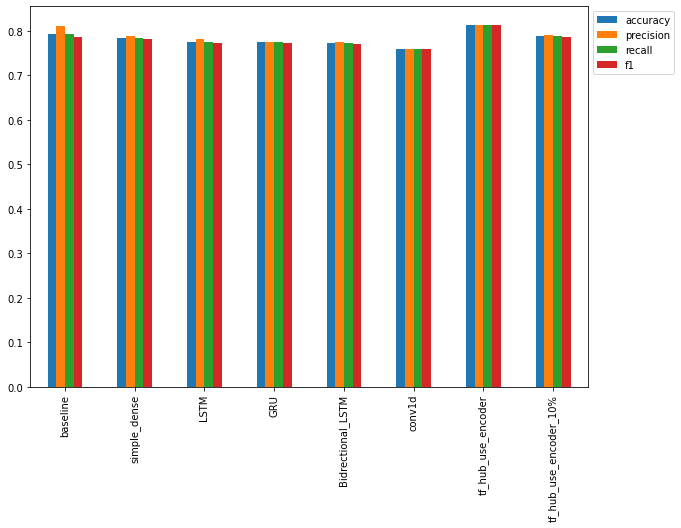

In [113]:
# Plot and compare all models results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

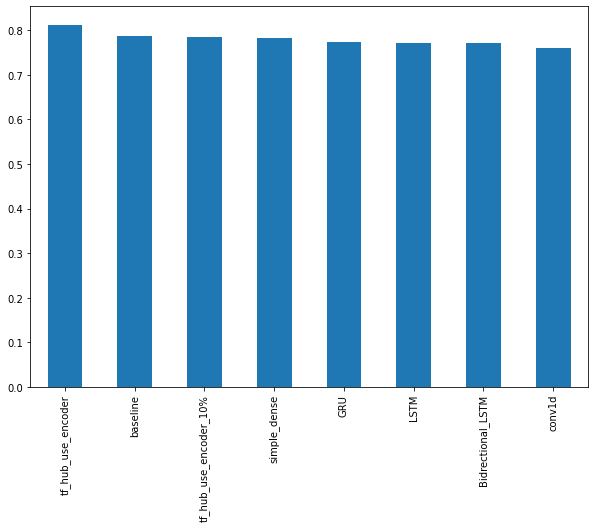

In [116]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

## Uploading training logs to tensorboard

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP modeling experiments" \
  --description "comparing multiple different types of architechtures on Kaggle's tweet classification dataset" \
  --one_shot

All the experiments are here : https://tensorboard.dev/experiment/3cGdHZkJS16wwagztKqwZQ/

## Finding the most wrong examples

In [118]:
# Download pretrained model from course
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-09-15 23:03:22--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  56.0MB/s    in 22s     

2022-09-15 23:03:44 (42.3 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.i

In [119]:
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [121]:
# Make predictions
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [123]:
# Create DataFrame with validation sentences and best performing model's predictions labels + probabilities
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [124]:
# Find the wrong predictions and sort by probs
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong.head()

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213


In [125]:
most_wrong.tail()

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


## Making and Visualizing Predictions with test dataset

In [128]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"\nText: \n{test_sample}\n")
  print("----\n")

Pred: 0, Prob: 0.031238485127687454

Text: 
@jassy_curtis wait I'm fckng obsessed with your song sirens

----

Pred: 0, Prob: 0.4562392234802246

Text: 
Demolition underway on @OU_Football stadium project. Stay updated throughout at http://t.co/ju09z2y7g0 http://t.co/UP0hOCgGrj

----

Pred: 1, Prob: 0.9596754908561707

Text: 
Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn...  http://t.co/KuBsM16OuD

----

Pred: 0, Prob: 0.08991207927465439

Text: 
@jackienatalydlt I do.... I only get the iced annihilation??

----

Pred: 1, Prob: 0.6158299446105957

Text: 
kayaking about killed us so mom and grandma came to the rescue.

----

Pred: 0, Prob: 0.2476567029953003

Text: 
@johngreen The catastrophic history of you and me

----

Pred: 1, Prob: 0.9771777987480164

Text: 
Per Malaysia's PM 'this piece of debris ... is conclusively a part from the wing of #MH370.' More right now http://t.co/Bd3ik4oz2r

----

Pred: 0, Prob: 0.3282272

In [131]:
# Custom example
pred_prob = tf.squeeze(model_6_pretrained.predict(["""Strong #earthquake of 7.6 magnitude strikes #Papua_New_Guinea. #tsunami alerted. Another 6.1 magnitude strikes #Indonesia. Pray for the safety. #EarthquakePH #Disaster #DisasterRelief """]))
pred = tf.round(pred_prob)
print(f"Pred: {int(pred)}, Prob: {pred_prob}")

Pred: 1, Prob: 0.9912919402122498


## The speed score tradeoff

In [134]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Time how long a model takes to make prediction on a sample.
  Args:
    model: model by which you'll make prediction
    sample: samples list
  Returns:
    total_time: total time to make prediction
    time_per_pred: time one prediction gets
  """
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [135]:
model_6_total_pred_time, model_6_per_pred_time = pred_timer(model_6_pretrained, val_sentences)
model_6_total_pred_time, model_6_per_pred_time

(0.24438149199977488, 0.00032071061942227675)

In [136]:
baseline_total_pred_time, baseline_per_pred_time = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_per_pred_time

(0.021298624999872118, 2.795095144340173e-05)

In [137]:
model_6_pretrained_results = calculate_results(val_labels,model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

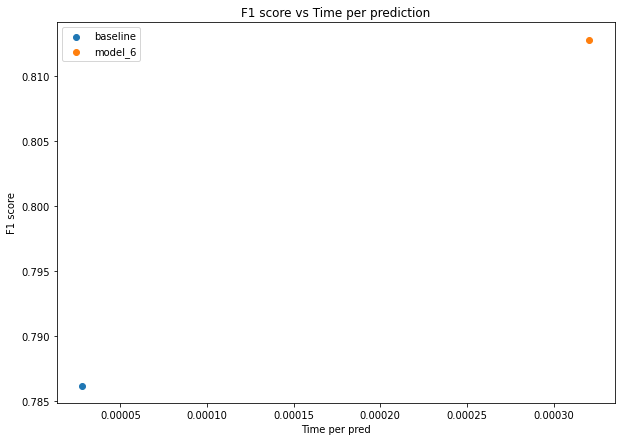

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_per_pred_time, baseline_results["f1"], label="baseline")
plt.scatter(model_6_per_pred_time, model_6_results["f1"], label="model_6")
plt.legend()
plt.title("F1 score vs Time per prediction")
plt.xlabel("Time per pred")
plt.ylabel("F1 score");